In [23]:
# importing the essential libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

K-Means Clustering is one of the most popular and straightforward unsupervised machine learning algorithms used for partitioning a dataset into distinct groups, or clusters.It is called "unsupervised" because it works with unlabeled data—data where the correct grouping is unknown beforehand.The main goal is to partition $n$ data points into $K$ clusters such that each data point belongs to the cluster with the nearest mean (or centroid), minimizing the Within-Cluster Sum of Squares

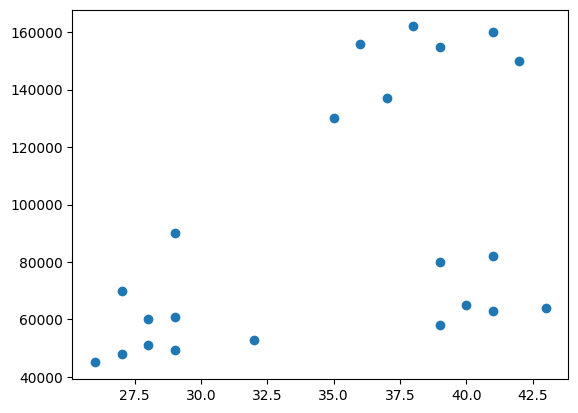

In [24]:
# reading the csv file
df = pd.read_csv("people_data.csv")
# plotting the values
plt.scatter(df['age'],df['income'])

In [25]:
# inducing the k means algorithm
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['age','income']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [26]:
# creating a new frame of data called cluster
# it stores the predicted cluster value
df['cluster'] = y_pred
df.head()

,Name,age,income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'INCOME')

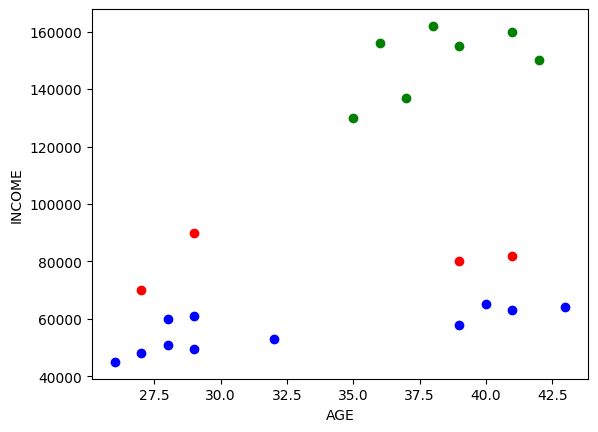

In [27]:
# making the three different dataframes
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

# plotting the dataframes with different colors
plt.scatter(df0['age'],df0['income'],color='red')
plt.scatter(df1['age'],df1['income'],color='green')
plt.scatter(df2['age'],df2['income'],color='blue')

plt.xlabel("AGE")
plt.ylabel("INCOME")

In [28]:
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

df.head()

,Name,age,income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [29]:
# now retraining the K with the data
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['age','income']])
y_pred
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [30]:
df['cluster'] = y_pred
df.head()

,Name,age,income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


Text(0, 0.5, 'INCOME')

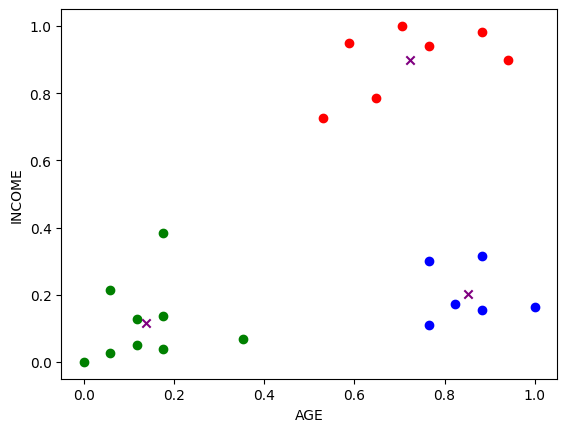

In [33]:
# making the three different dataframes
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

# plotting the dataframes with different colors
plt.scatter(df0['age'],df0['income'],color='red')
plt.scatter(df1['age'],df1['income'],color='green')
plt.scatter(df2['age'],df2['income'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='x')

plt.xlabel("AGE")
plt.ylabel("INCOME")

In [37]:
# here we are tying to find sse
# km.inertia is the sse
k = 10
sse = []
for i in range(1,k):
    km = KMeans(n_clusters=i)
    km.fit_predict(df[['age','income']])
    sse.append(km.inertia_)
sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.43914742576746363,
 0.3115461388117862,
 0.25717730165723546,
 0.1915129383410814,
 0.1471853679399594,
 0.11169921348883584]

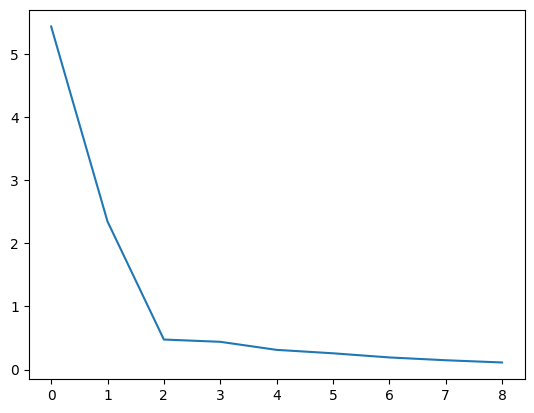

In [38]:
plt.plot(sse)

here the down step is found at 2 which is the third bend so the model is efficient at 3 clusters